In [ ]:
import pandas as pd
edata=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/spam.csv",encoding='latin-1')

In [ ]:
edata

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
edata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**CLEANING THE DATA**

In [ ]:
edata.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)   #Cleaning the data

In [ ]:
edata.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
edata.text = enc.fit_transform(edata.text)
edata.target = enc.fit_transform(edata.target)

In [ ]:
edata.isnull().sum()          #To check out Missing Values

target    0
text      0
dtype: int64

In [ ]:
edata.duplicated().sum()     #To Check out duplicacy

403

In [ ]:
edata.drop_duplicates()

,target,text
0,0,1079
1,0,3101
2,1,1000
3,0,4088
4,0,2757
...,...,...
5567,1,3992
5568,0,4560
5569,0,3286
5570,0,3901


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
edata['target'].value_counts()      # ham msgs are more compared to  spam

ham     4825
spam     747
Name: target, dtype: int64

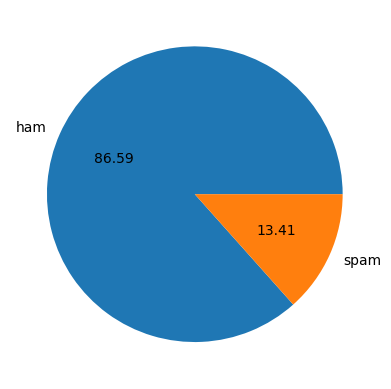

In [ ]:
import matplotlib.pyplot as plt
plt.pie(edata['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
edata['num_char'] = edata['text'].apply(len)
edata.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# edata['num_words'] = edata['text'].apply(lambda x : len(nltk.word_tokenize(x)))
# edata.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# edata['num_sent'] = edata['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
# edata.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
edata.describe()

,target,num_char,num_words,num_sent
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
# edata[edata['target']==1][['num_char','num_words' ,'num_sent']].describe()    #spam

,num_char,num_words,num_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# edata[edata['target'] == 0][['num_char','num_words','num_sent']].describe()          #ham

,num_char,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<ipython-input-120-bda9cb8b18f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edata.corr())


<Axes: >

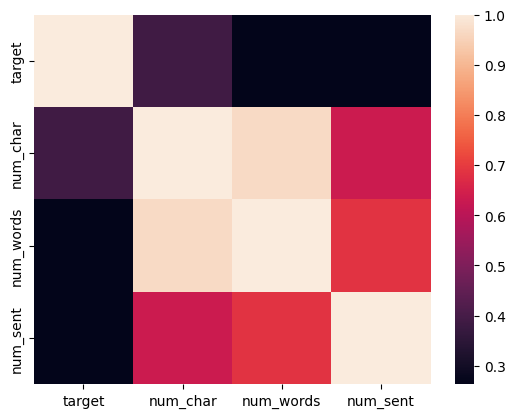

In [ ]:
import seaborn as sns
sns.heatmap(edata.corr())

In [ ]:
x=edata.drop(['target'],axis=1)
x

,text,num_char,num_words,num_sent
0,1079,111,24,2
1,3101,29,8,2
2,1000,155,37,2
3,4088,49,13,1
4,2757,61,15,1
...,...,...,...,...
5567,3992,161,35,4
5568,4560,37,9,1
5569,3286,57,15,2
5570,3901,125,27,1


In [ ]:
y=edata['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

# **REGRESSION MODELS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer        # NaiveBayes

from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
model1=SVC()   #kernal,gamma
model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)
score1=accuracy_score(y_test,y_predict)*100
score1

85.8578607322326

In [ ]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
y_predict=mode2.predict(x_test)
score2=accuracy_score(y_test,y_predict)*100
score2

94.18521177315147

In [ ]:
model3=KNeighborsClassifier(n_neighbors=1)
model3.fit(x_train,y_train)
y_predict=model3.predict(x_test)
score3=accuracy_score(y_test,y_predict)*100
score3

92.39052404881551

In [ ]:
model4=DecisionTreeClassifier()
model4.fit(x_train,y_train)
y_predict=mode14.predict(x_test)
score4=accuracy_score(y_test,y_predict)*100
score4

92.60588657573582

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
model5=MultinomialNB()
model5.fit(x_train,y_train)
y_predict=model5.predict(x_test)
score5=accuracy_score(y_test,y_predict)*100
score5

63.67552045944006

# **CONCLUSION**

AS COMPARED TO ALL THE CLASSIFICATION MODELS RANDOMFOREST CLASSIFIER HAS GIVEN THE BEST ACCURACY WITH 94 ... HENCE RANDOMFOREST CLASSIFIER IS THE BEST MODEL FOR THE 'EMAIL SPAM DETECTION'